In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

file_name_1 = "gdrive/My Drive/Sentiment_analysis/tweets_train.csv"

data = pd.read_csv(file_name_1)
import re
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for match in r:
        input_txt = re.sub(match,'',input_txt)
    return input_txt

# remove user handles

data['clean_text'] = data['tweet'].apply(lambda row:remove_pattern(str(row),"@[A-Za-z0-9]+"))
data['clean_text'] = data['clean_text'].apply(lambda row:remove_pattern(str(row),"[1-9]"))

data['clean_text'] = data['clean_text'].str.replace("[^a-zA-Z#]", " ")
data['clean_text'] = data['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])).str.lower()
data['clean_text'] = data['clean_text'].str.replace("#", " ")

data['clean_text2'] = data['clean_text'].str.replace("[^a-zA-Z#]", " ")
data['clean_text2'] =data['clean_text2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])).str.lower()
# first five observations
data['clean_text2'][5]

'technews lone dude awaits ipad apple sxsw store link tech news apple ipad sxsw tablets tech'

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


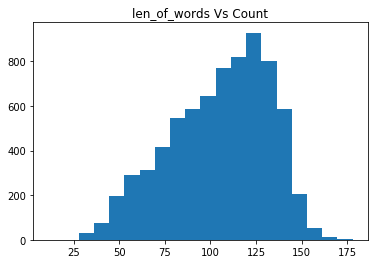

In [0]:
length_train = data['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.title('len_of_words Vs Count')
plt.show()

In [0]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from string import punctuation
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
stop_words = list(list(punctuation)+['``', "'s", "...", "n't",'RT',"sxsw'","sxswi"])
from nltk.stem.porter import *

# tokenize
data['tokenized_text'] = [nltk.word_tokenize(x) for x in data['clean_text']]

# stopword removal
data['tokenized_text'] = data['tokenized_text'].apply(lambda row : [str(word).lower() for word in row]).apply(lambda x : [str(i).replace('sxswi','sxsx') for i in x ]).apply(lambda x : [str(i).replace('ipad2','ipad') for i in x ]).apply(lambda row : [str(word).lower() for word in row if word not in stop_words])
stemmer = PorterStemmer()
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: ' '.join(x) )
print(data['tokenized_text'].head(6))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0    sxswnui sxsw appl defin languag touch with dif...
1    learn googl doodl doodl should light funni inn...
2    most your face steal show quot sxsw appl schoo...
3    thi iphon sxsw would pretti awesom didn crash ...
4    line outsid appl store austin wait ipad sxsw link
5    technew lone dude await ipad appl sxsw store l...
Name: tokenized_text, dtype: object


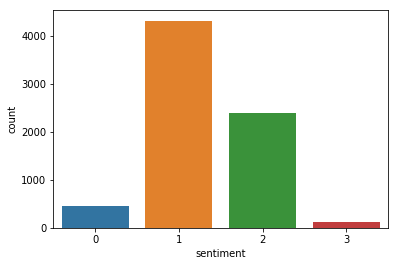

In [0]:
import seaborn as sns
sns.countplot(data.sentiment)

(-0.5, 999.5, 807.5, -0.5)

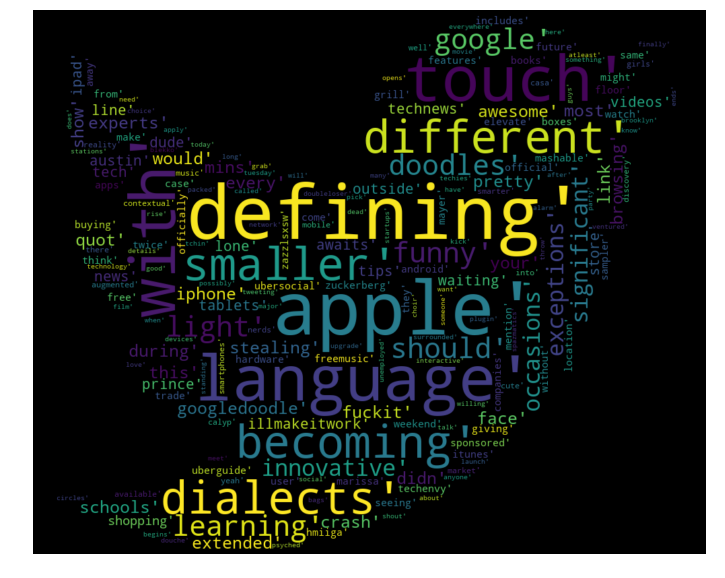

In [0]:
from wordcloud import WordCloud
from PIL import Image
img = Image.open("gdrive/My Drive/Sentiment_analysis/twitter_mask.png")
all_words_lemma =list(data['tokenized_text'].apply(pd.Series).stack().unique())
mask_twitter = np.array(img)
# generate wordcloud object
wordcloud_lemma = WordCloud(width=800, height=600, random_state=21, max_font_size=110,mask = mask_twitter,background_color='Black').generate(str(all_words_lemma))

# plot wordcloud

plt.figure( figsize=(20,10),facecolor = 'white', edgecolor='blue' )
plt.imshow(wordcloud_lemma, interpolation='bilinear')
plt.axis('off')

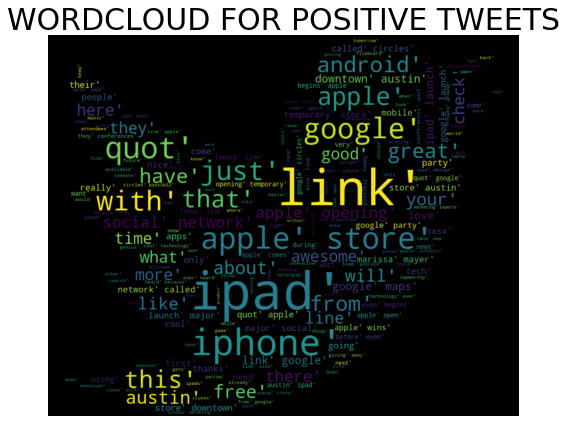

In [0]:
# positive tweets
pos_words =' '.join([str(text) for text in data['tokenized_text'][data['sentiment'] == 2]])

# generate wordcloud object for positive tweets
pos_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,mask = mask_twitter,background_color='Black').generate(pos_words)
plt.figure(figsize=(10, 7),facecolor = 'white', edgecolor='blue' )
plt.title('WORDCLOUD FOR POSITIVE TWEETS',fontsize=30)
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis('off')
pos = [k for k,v in pos_wordcloud.words_.items()]


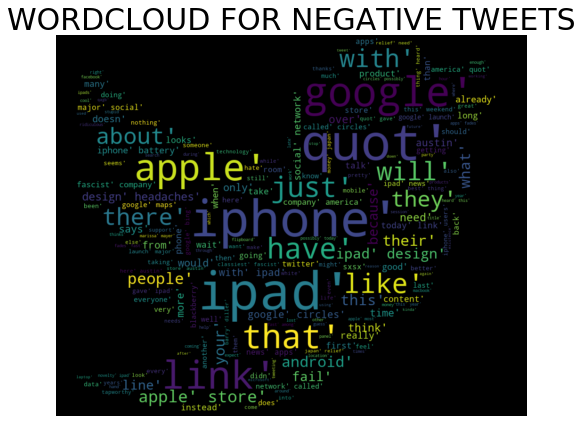

In [0]:
# negative tweets
neg_words =' '.join([str(text) for text in data['tokenized_text'][data['sentiment'] == 0]])

# generate wordcloud object for positive tweets
neg_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,mask = mask_twitter,background_color='Black').generate(neg_words)
plt.figure(figsize=(10, 7),facecolor = 'white', edgecolor='blue' )
plt.title('WORDCLOUD FOR NEGATIVE TWEETS',fontsize=30)
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis('off')
neg = [k for k,v in neg_wordcloud.words_.items()]

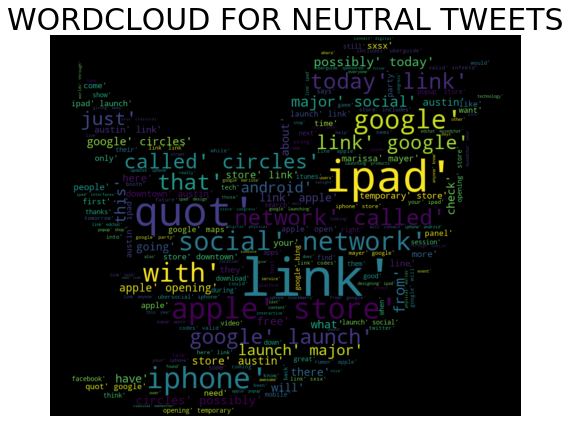

In [0]:
# neutral tweets
neutral_words =' '.join([str(text) for text in data['tokenized_text'][data['sentiment'] == 1]])

# generate wordcloud object for positive tweets
neutral_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,mask = mask_twitter,background_color='Black').generate(neutral_words)
plt.figure(figsize=(10, 7),facecolor = 'white', edgecolor='blue' )
plt.title('WORDCLOUD FOR NEUTRAL TWEETS',fontsize=30)
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis('off')
neu = [k for k,v in neutral_wordcloud.words_.items()]

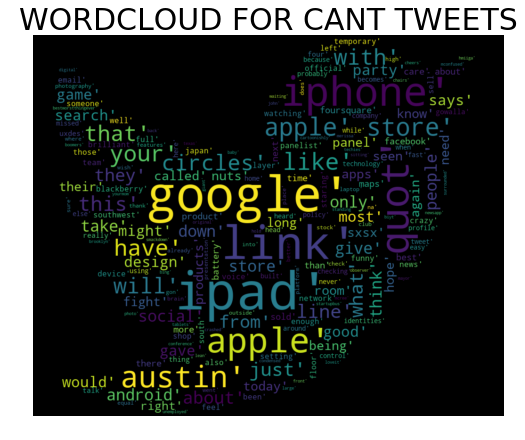

In [0]:
# cant tweets
cant_words =' '.join([str(text) for text in data['tokenized_text'][data['sentiment'] == 3]])

# generate wordcloud object for positive tweets
cant_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,mask = mask_twitter,background_color='Black').generate(cant_words)
plt.figure(figsize=(10, 7),facecolor = 'white', edgecolor='blue' )
plt.title('WORDCLOUD FOR CANT TWEETS',fontsize=30)
plt.imshow(cant_wordcloud, interpolation="bilinear")
plt.axis('off')
cant = [k for k,v in cant_wordcloud.words_.items()]

In [0]:
def word_count(sentence):
    return len(str(sentence).split())
    
data['word count'] = data['clean_text'].apply(word_count)

# plot word count distribution for both positive and negative sentiments
x = data[''][data.label == 2]
y = data['word count'][data.label == 0]
z = data['word count'][data.label == 1]
w = data['word count'][data.label == 3]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y], color=['r','b','g','y'], alpha=0.5, label=['positive','negative','neutral',"can't tell"])
plt.legend(loc='upper right')

KeyError: ignored

In [0]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", str(i).lower())
        hashtags.append(ht)

    return hashtags
  
 # extracting hashtags from positive

HT_positive = hashtag_extract(data['tweet'][data['sentiment'] == 2])

# extracting hashtags from negative
HT_negative = hashtag_extract(data['tweet'][data['sentiment'] == 0])

# extracting hashtags from neutral
HT_neutral = hashtag_extract(data['tweet'][data['sentiment'] == 1])

# extracting hashtags from cant
HT_cant = hashtag_extract(data['tweet'][data['sentiment'] == 3])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])
HT_neutral = sum(HT_neutral,[])
HT_cant = sum(HT_cant,[])


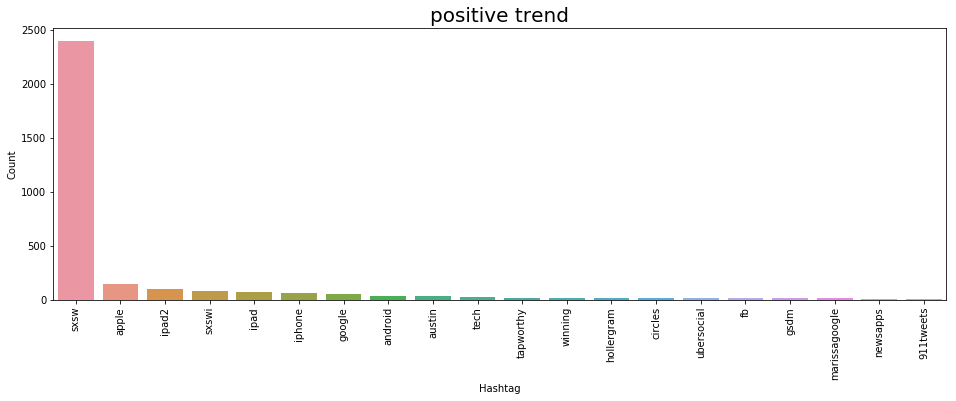

In [0]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
plt.title('positive trend',fontsize=20)
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.show()

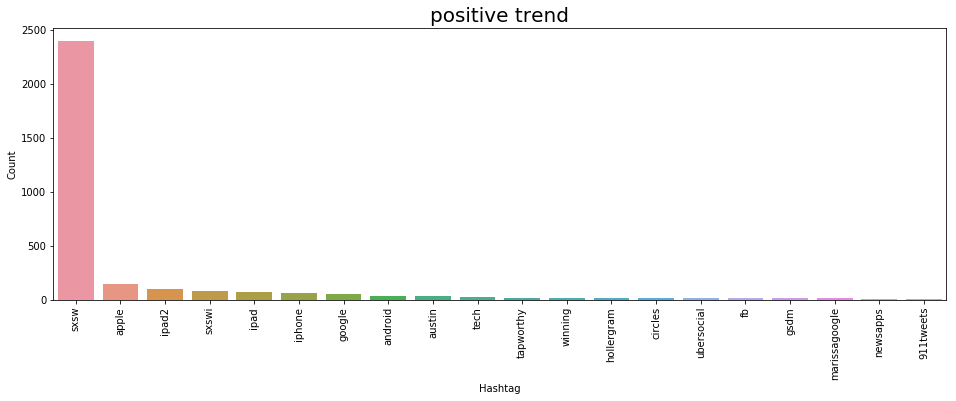

In [0]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
plt.title('positive trend',fontsize=20)
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.show()

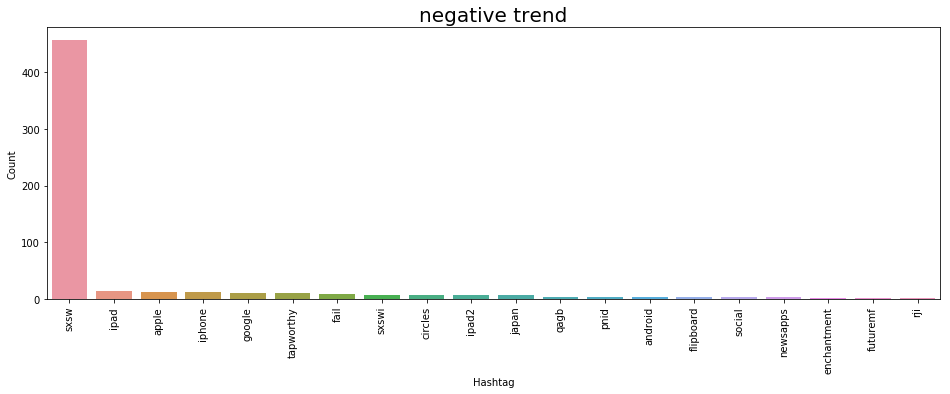

In [0]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
plt.title('negative trend',fontsize=20)
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.show()

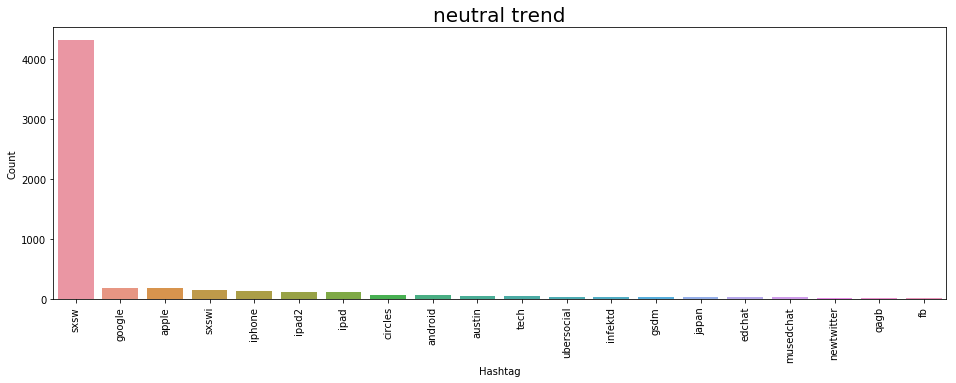

In [0]:
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
plt.title('neutral trend',fontsize=20)
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.show()

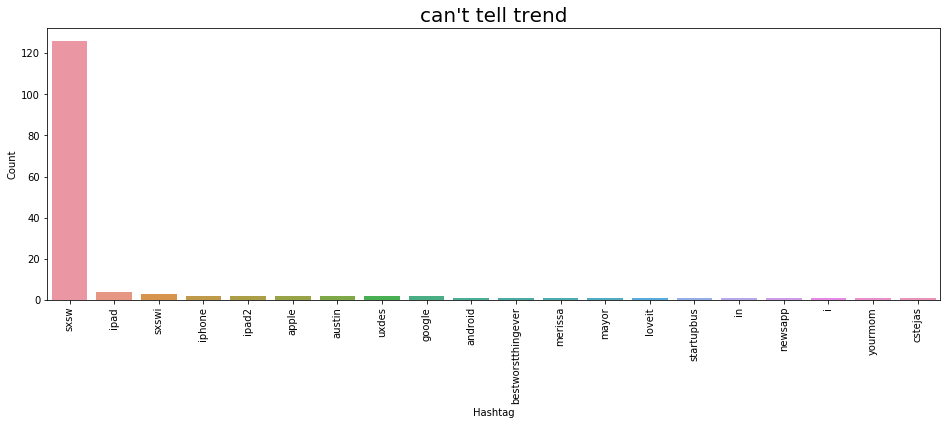

In [0]:
a = nltk.FreqDist(HT_cant)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
plt.title("can't tell trend",fontsize=20)
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.show()

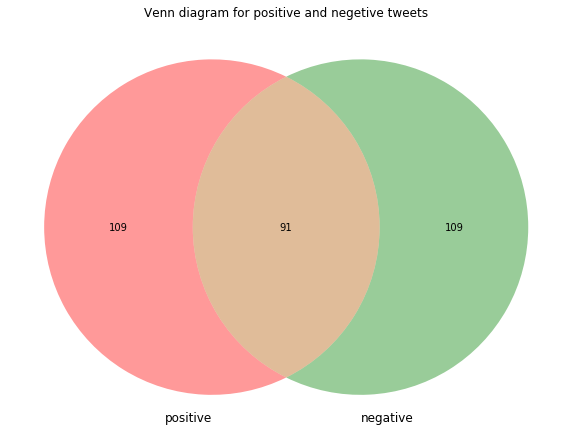

In [0]:
###VENN Diagram
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_circles
set1 = set(pos)
set2 = set(neg)
set3 = set(neu)
set4 = set(cant)
plt.figure(figsize =(10,10))
plt.title('Venn diagram for positive and negetive tweets')
venn2([set1, set2], ('positive', 'negative'))

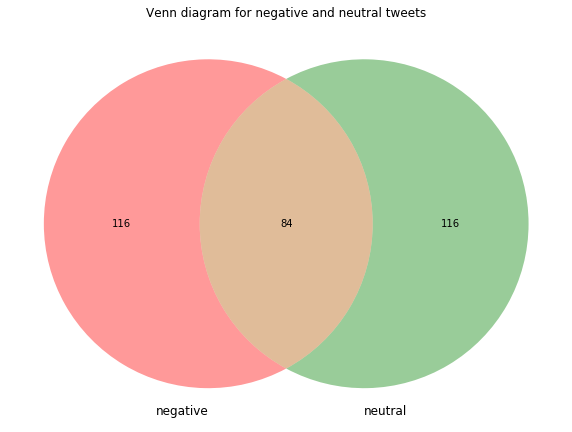

In [0]:
plt.figure(figsize =(10,10))
plt.title('Venn diagram for negative and neutral tweets')
venn2([set2, set3], ('negative','neutral'))

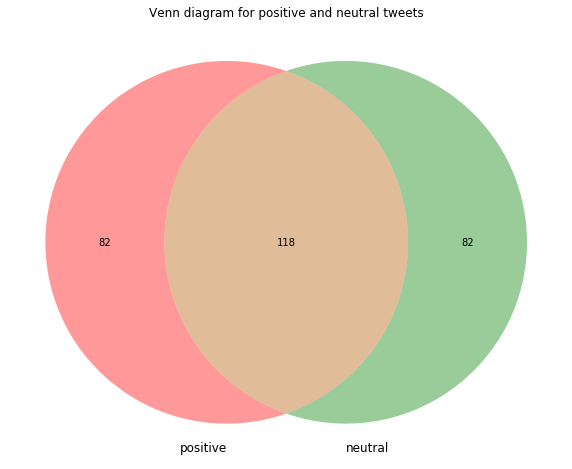

In [0]:
plt.figure(figsize =(10,10))
plt.title('Venn diagram for positive and neutral tweets')
venn2([set1, set3], ('positive', 'neutral'))

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(data['tokenized_text'].apply(lambda x: ' '.join(x)))
bow.shape

ValueError: ignored

In [0]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data['tokenized_text'].apply(lambda x: ' '.join(x)))
tfidf.shape

ValueError: ignored

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#Splitting the dataset into train and test
X_train_bow,X_test_bow,y_train_bow,y_test_bow = train_test_split(bow,data['sentiment'],test_size=0.3,random_state=42)

#Initialising the logistic regression model
log_reg_bow = LogisticRegression(random_state=42)

#Fitting the model with train data
log_reg_bow.fit(X_train_bow,y_train_bow)

#Finding the accuracy score of model on test data
print(f1_score(y_train_bow,log_reg_bow.predict(X_train_bow),average = 'weighted'))
print(f1_score(y_test_bow,log_reg_bow.predict(X_test_bow),average = 'weighted'))

0.7241326065744434
0.6275253568412075


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
#Splitting the dataset into train and test
X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf = train_test_split(tfidf,data['sentiment'],test_size=0.3,random_state=42)

#Initialising the logistic regression model
log_reg_tfidf = LogisticRegression(random_state=42)

#Fitting the model with train data
log_reg_tfidf.fit(X_train_tfidf,y_train_tfidf)

#Finding the accuracy score of model on test data
print(f1_score(y_train_tfidf,log_reg_tfidf.predict(X_train_tfidf),average = 'weighted'))
print(f1_score(y_test_tfidf,log_reg_tfidf.predict(X_test_tfidf),average = 'weighted'))

0.672391104237113
0.5995044730074147


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn import svm
svc_bow = svm.SVC(kernel='linear', C=1, probability=True)
svc_bow.fit(X_train_bow, y_train_bow)

print(f1_score(y_train_bow,svc_bow.predict(X_train_bow),average = 'weighted'))
print(f1_score(y_test_bow,svc_bow.predict(X_test_bow),average = 'weighted'))

0.764148428015024
0.6138628697145778


In [0]:
svc_tfidf = svm.SVC(kernel='linear', C=1, probability=True)
svc_tfidf.fit(X_train_tfidf, y_train_tfidf)

print(f1_score(y_train_tfidf,svc_tfidf.predict(X_train_tfidf),average = 'weighted'))
print(f1_score(y_test_tfidf,svc_tfidf.predict(X_test_tfidf),average = 'weighted'))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6947794592943428
0.6078986724885043


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.naive_bayes import MultinomialNB
nb_bow = MultinomialNB()

nb_bow.fit(X_train_bow, y_train_bow)

print(f1_score(y_train_bow,nb_bow.predict(X_train_bow),average = 'weighted'))
print(f1_score(y_test_bow,nb_bow.predict(X_test_bow),average = 'weighted'))

0.699214885180046
0.602691528842699


In [0]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)

print(f1_score(y_train_tfidf,nb_tfidf.predict(X_train_tfidf),average = 'weighted'))
print(f1_score(y_test_tfidf,nb_tfidf.predict(X_test_tfidf),average = 'weighted'))

0.6648774542465226
0.5957702916674511


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.ensemble import RandomForestClassifier
rf_bow = RandomForestClassifier(n_estimators=100, random_state=22,warm_start=True,oob_score=True)
rf_bow.fit(X_train_bow, y_train_bow)

print('oob score :',rf_bow.oob_score_)
print(f1_score(y_train_bow,rf_bow.predict(X_train_bow),average = 'weighted'))
print(f1_score(y_test_bow,rf_bow.predict(X_test_bow),average = 'weighted'))

oob score : 0.63877430760165
0.9471773771202087
0.638387785236807


In [0]:
rf_tfidf =RandomForestClassifier(n_estimators=200, random_state=22,warm_start=True,oob_score=True)
rf_tfidf.fit(X_train_tfidf, y_train_tfidf)

print('oob score :',rf_tfidf.oob_score_)
print(f1_score(y_train_tfidf,rf_tfidf.predict(X_train_tfidf),average = 'weighted'))
print(f1_score(y_test_tfidf,rf_tfidf.predict(X_test_tfidf),average = 'weighted'))
rf_tfidf

oob score : 0.6613631899430368
0.9470254983968315
0.6335187009291159


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=True, random_state=22, verbose=0,
                       warm_start=True)

In [0]:
from xgboost import XGBClassifier

xgb_bow = XGBClassifier(max_depth=6, n_estimators=1000)
xgb_bow.fit(X_train_bow, y_train_bow)

print(f1_score(y_train_bow,xgb_bow.predict(X_train_bow),average = 'weighted'))
print(f1_score(y_test_bow,xgb_bow.predict(X_test_bow),average = 'weighted'))

0.8320701272494694
0.6431509550222245


In [0]:
xgb_tfidf =XGBClassifier(max_depth=6, n_estimators=1000)
xgb_tfidf.fit(X_train_tfidf, y_train_tfidf)

print(f1_score(y_train_tfidf,xgb_tfidf.predict(X_train_tfidf),average = 'weighted'))
print(f1_score(y_test_tfidf,xgb_tfidf.predict(X_test_tfidf),average = 'weighted'))

0.915914262063641
0.6396292593815577


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer


In [0]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
X_ros,y_ros = ros.fit_sample(X_train_tfidf,y_train_tfidf)
nb_tfidf.fit(X_ros, y_ros)

print('oob score :',rf_tfidf.oob_score_)
print(f1_score(y_train_tfidf,rf_tfidf.predict(X_train_tfidf),average = 'weighted'))
print(f1_score(y_test_tfidf,rf_tfidf.predict(X_test_tfidf),average = 'weighted'))


oob score : 0.8671433322248088
0.9518660461413464
0.6419510246863114


In [0]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state = 0)
X_smo,y_smo = smo.fit_sample(X_train_tfidf,y_train_tfidf)
rf_tfidf.fit(X_smo, y_smo)

print('oob score :',rf_tfidf.oob_score_)
print(f1_score(y_train_tfidf,rf_tfidf.predict(X_train_tfidf),average = 'weighted'))
print(f1_score(y_test_tfidf,rf_tfidf.predict(X_test_tfidf),average = 'weighted'))


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


oob score : 0.6151479880279348
0.9470254983968315
0.6335187009291159


In [0]:
from sklearn.cluster import KMeans

kmeans_tfidf = KMeans(n_clusters=4)
kmeans_tfidf.fit(X_ros)

print(f1_score(y_train_tfidf,kmeans_tfidf.predict(X_train_tfidf),average = 'weighted'))
print(f1_score(y_test_tfidf,kmeans_tfidf.predict(X_test_tfidf),average = 'weighted'))


0.35040036991062484
0.35518423804997434


In [0]:
svc_bow_rbf = svm.SVC(kernel='linear', C=1, probability=True)
svc_bow_rbf.fit(X_train_bow, y_train_bow)

print(f1_score(y_train_bow,svc_bow_rbf.predict(X_train_bow),average = 'weighted'))
print(f1_score(y_test_bow,svc_bow_rbf.predict(X_test_bow),average = 'weighted'))
svc_bow_rbf

0.835451914129284
0.6301794462022403


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

tokenized_tweet = data['tokenized_text']

labeled_tweets = add_label(tokenized_tweet)
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  size=1000, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

docvec_arrays = np.zeros((len(tokenized_tweet), 1000))

for i in range(len(data)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,1000))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

X_train1,X_test1,y_train1,y_test1 = train_test_split(docvec_df,data['sentiment'],test_size=0.3,random_state=42)
rf_tfidf1 =RandomForestClassifier(n_estimators=200, random_state=22,warm_start=True,oob_score=True)
rf_tfidf1.fit(X_train1, y_train1)

print('oob score :',rf_tfidf1.oob_score_)
print(f1_score(y_train1,rf_tfidf1.predict(X_train1),average = 'weighted'))
print(f1_score(y_test1,rf_tfidf1.predict(X_test1),average = 'weighted'))


/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 7274/7274 [00:00<00:00, 2261796.08it/s]


oob score : 0.5886859163229228
1.0
0.44676536276814305


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=2000, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(data['tokenized_text']), epochs=20)

def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec
  
wordvec_arrays = np.zeros((len(tokenized_tweet), 2000))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 2000)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(7274, 2000)

In [0]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(wordvec_df,data['sentiment'],test_size=0.3,random_state=42)
rf_tfidf2 =RandomForestClassifier(n_estimators=200, random_state=22,warm_start=True,oob_score=True)
rf_tfidf2.fit(X_train2, y_train2)

print('oob score :',rf_tfidf2.oob_score_)
print(f1_score(y_train2,rf_tfidf2.predict(X_train2),average = 'weighted'))
print(f1_score(y_test2,rf_tfidf2.predict(X_test2),average = 'weighted'))


In [0]:
from sklearn import svm
svc_tfidf1 = svm.SVC(kernel='linear', C=1, probability=True)
svc_tfidf1.fit(X_train2, y_train2)

print(f1_score(y_train2,svc_tfidf1.predict(X_train2),average = 'weighted'))
print(f1_score(y_test2,svc_tfidf1.predict(X_test2),average = 'weighted'))

KeyboardInterrupt: ignored

In [0]:
file_name_2 = "gdrive/My Drive/Sentiment_analysis/tweets_test.csv"

test = pd.read_csv(file_name_2)

test['clean_text'] = test['tweet'].apply(lambda row:remove_pattern(str(row),"@[A-Za-z0-9]+"))
test['clean_text'] = test['clean_text'].apply(lambda row:remove_pattern(str(row),"[1-9]"))

test['clean_text'] = test['clean_text'].str.replace("[^a-zA-Z#]", " ")
test['clean_text'] = test['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])).str.lower()
test['clean_text'] = test['clean_text'].str.replace("#", " ")

# tokenize
test['tokenized_text'] = [nltk.word_tokenize(x) for x in test['clean_text']]

# stopword removal
test['tokenized_text'] = test['tokenized_text'].apply(lambda row : [str(word).lower() for word in row]).apply(lambda x : [str(i).replace('sxswi','sxsx') for i in x ]).apply(lambda x : [str(i).replace('ipad2','ipad') for i in x ]).apply(lambda row : [str(word).lower() for word in row if word not in stop_words])
print(data['tokenized_text'].head(6))

tfidf_vectorizer1 = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf1 = tfidf_vectorizer1.fit_transform(test['tokenized_text'].apply(lambda x: ' '.join(x)))



test['sentiment'] = rf_tfidf.predict(tfidf1)
test['sentiment'].value_counts()
test_data = test[['tweet_id','sentiment']]

0    [apple, defining, language, touch, with, diffe...
1    [learning, google, doodles, doodles, should, l...
2    [most, your, face, stealing, show, quot, apple...
3    [this, iphone, would, pretty, awesome, didn, c...
4    [line, outside, apple, store, austin, waiting,...
5    [technews, lone, dude, awaits, ipad, apple, st...
Name: tokenized_text, dtype: object


In [0]:
test['sentiment'].value_counts()

1    1709
2     108
0       2
Name: sentiment, dtype: int64

In [0]:
test_data.to_csv('test_data')
!cp data.csv drive/My\ Drive

cp: cannot stat 'data.csv': No such file or directory


In [0]:
from sklearn.multiclass import OneVsRestClassifier

def fitAndPredict(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc_score = accuracy_score(y_test, y_pred)
  prec_score = precision_score(y_test, y_pred, average='macro')
  f1score = f1_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro')
  print("Accuracy Score:{}".format(acc_score))
  print("Precision Score:{}".format(prec_score))
  print("F1 Score:{}".format(f1score))
  print("Recall:{}".format(recall))
  return acc_score, prec_score, f1score, recall




In [0]:
from sklearn.metrics import accuracy_score,recall_score,precision_score

over_rf = OneVsRestClassifier(RandomForestClassifier(random_state=0, n_jobs=-1))
ovr_rf_metrics = fitAndPredict(rf_tfidf, X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Accuracy Score:0.6614750343563903
Precision Score:0.48148894003324383
F1 Score:0.39874068257824385
Recall:0.3770297079454514
